## 1. Importing libraries

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.insert(0, './modules')
from Data_prep import Data
from Feature_engg import Feature_generator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 2. Define parameters required to create data

In [5]:
#define number of processors to use for parallel runs
num_procs = 4

#set verbose level for models
verbose_lvl = 0

#define input files
train_feature_file = r'C:\Users\Admin\Desktop\salary_predictions\data\train_features.csv'
train_target_file = r'C:\Users\Admin\Desktop\salary_predictions\data\train_salaries.csv'
test_file = r'C:\Users\Admin\Desktop\salary_predictions\data\test_features.csv'

#define variables
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
target_col = 'salary'
id_col = 'jobId'

#turn feature engineering on/off
engineer_features = True

## 3. Creating a data object

In [6]:
data = Data(train_feature_file, train_target_file, test_file, cat_cols, num_cols, target_col, id_col)

In [7]:
if engineer_features:
    feature_generator = Feature_generator(data)
    feature_generator.add_group_stats()

In [9]:
data.train_df = data.train_df.sample(n = 10000,replace = True, random_state = 2)
data.train_df.shape

(10000, 15)

## 4. Train/test split

In [6]:
# Split Train/Test Set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data.train_df.drop(["salary","index","jobId"], axis=1), data.train_df["salary"],random_state=10, test_size=0.25)

## 5. Tuning hyperparmeters using learning curves 
## 5.1 Tuning max_depth 

## The optimal max_depth parameter is 10

1 depth
mse Train:  895.2763469396486
mse Test:  857.9570417370278
 
2 depth
mse Train:  701.663519837911
mse Test:  672.0538268683025
 
3 depth
mse Train:  542.5202003997562
mse Test:  521.6001113094258
 
4 depth
mse Train:  427.2930302969358
mse Test:  423.31430655419825
 
5 depth
mse Train:  363.23002659763284
mse Test:  379.01045435548934
 
10 depth
mse Train:  167.21493051290997
mse Test:  355.1243149997163
 
20 depth
mse Train:  67.90957997453468
mse Test:  381.68010148081987
 
50 depth
mse Train:  67.45485233333332
mse Test:  382.87370400000003
 
100 depth
mse Train:  67.45485233333332
mse Test:  382.87370400000003
 


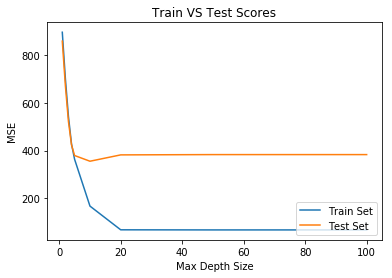

In [7]:
results  =  []
results2 = []
max_depth_size  = [1,2,3,4,5,10,20,50,100]

for depth in max_depth_size:
    model = RandomForestRegressor(max_depth = depth, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train_2, y_train_2)
    print(depth, 'depth')
    pred = model.predict(X_train_2)
    pred2 = model.predict(X_test_2)
    mse1 = metrics.mean_squared_error(y_train_2, pred)
    mse2 = metrics.mean_squared_error(y_test_2, pred2)
    print('mse Train: ', mse1)
    print('mse Test: ', mse2)
    results.append(mse1)
    results2.append(mse2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('MSE')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

## 6.2 Tuning n_estimators

## The optimal number of estimators is 100

1 estimator
mse Train:  271.48453333333333
mse Test:  719.804
 
2 estimator
mse Train:  147.47636666666668
mse Test:  525.2033
 
3 estimator
mse Train:  113.9162074074074
mse Test:  475.8791555555556
 
4 estimator
mse Train:  97.4546625
mse Test:  440.947
 
5 estimator
mse Train:  88.07005066666665
mse Test:  423.427712
 
10 estimator
mse Train:  67.45485233333332
mse Test:  382.87370400000003
 
20 estimator
mse Train:  57.03220375000001
mse Test:  361.0078667777778
 
50 estimator
mse Train:  50.405973477407414
mse Test:  350.38584534555554
 
100 estimator
mse Train:  48.515221548518525
mse Test:  345.78636692500004
 


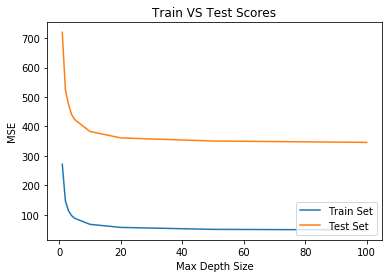

In [8]:
results  =  []
results2 = []
estimators  = [1,2,3,4,5,10,20,50,100]

for estimator in estimators:
    model = RandomForestRegressor(n_estimators = estimator, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train_2, y_train_2)
    print(estimator, 'estimator')
    pred = model.predict(X_train_2)
    pred2 = model.predict(X_test_2)
    mse1 = metrics.mean_squared_error(y_train_2, pred)
    mse2 = metrics.mean_squared_error(y_test_2, pred2)
    print('mse Train: ', mse1)
    print('mse Test: ', mse2)
    results.append(mse1)
    results2.append(mse2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('MSE')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

## 5.3 Tuning max_features using OOB score 
## The optimal max_features is 0.7

auto option
oob:  0.7370926823356438
 
None option
oob:  0.7370926823356438
 
sqrt option
oob:  0.7196541741954294
 
log2 option
oob:  0.7196541741954294
 
0.7 option
oob:  0.7326185697024112
 
0.2 option
oob:  0.7114745929104072
 


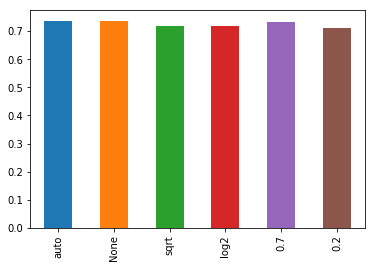

In [9]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.7, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train_2, y_train_2)
    print(max_features, "option")
    oob = model.oob_score_
    print('oob: ', oob)
    results.append(oob)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='bar')

## 5.4 Tuning min_samples_leaf using OOB score 

## The optimum min_samples_leaf is 9

1 min samples
oob:  0.7680682949726445
 
2 min samples
oob:  0.7706062060408911
 
3 min samples
oob:  0.7719286049343795
 
4 min samples
oob:  0.774374077218009
 
5 min samples
oob:  0.774018001788908
 
6 min samples
oob:  0.7750146277690888
 
7 min samples
oob:  0.7748633554567338
 
8 min samples
oob:  0.7749485896848032
 
9 min samples
oob:  0.7757044347584899
 
10 min samples
oob:  0.775240722562477
 
20 min samples
oob:  0.7732724490831674
 


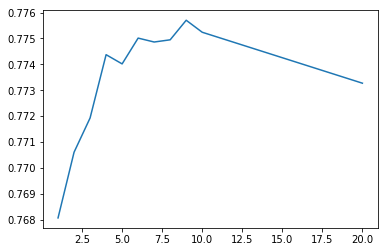

In [10]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features=0.7, min_samples_leaf=min_samples)
    model.fit(X_train_2, y_train_2)
    print(min_samples, "min samples")
    oob = model.oob_score_
    print('oob: ', oob)
    results.append(oob)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

## 6. Perform grid_search

In [11]:
model = RandomForestRegressor()

In [17]:
# Define Parameters
param_grid = {"max_depth": [9,10,11],
              "max_features" : [0.7,0.8],
              "min_samples_leaf" : [9,10,11],
              "n_estimators": [100,150,200]
             }

In [18]:
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train_2, y_train_2)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   49.8s finished


In [16]:
gs_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)